In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import seaborn as sns
sns.set(color_codes=True)
sns.set_style("whitegrid")

In [3]:
titanic = pd.read_csv('titanic_data.csv', header = 0)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


 As we can see , the column Age has some missing values. We can fix that by assuming them as the average age of the passengers.
Also , the column 'Sex' can be of some significance but since its of datatype string we can't use it , so we shall convert it into numerical data so that it can be used in computations.

In [5]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean())

In [6]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


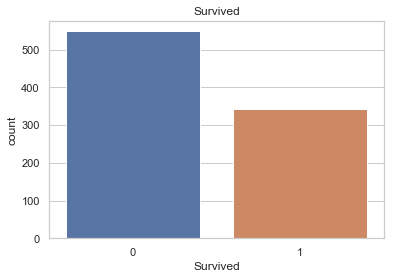

In [7]:
sns.countplot('Survived',data=titanic)
plt.title('Survived')
plt.show()

As we can see in the above graph the number of passenger who survived are quite less than those who didn't survive.

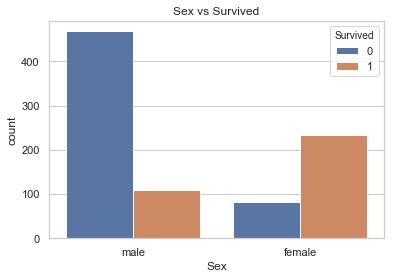

In [8]:
sns.countplot('Sex',hue='Survived',data=titanic,)
plt.title('Sex vs Survived')
plt.show()

In [9]:
titanic.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

It is clear that 233 females survived while 109 males survived . Number of males who didn't survive is far more than number of females who didn't survive

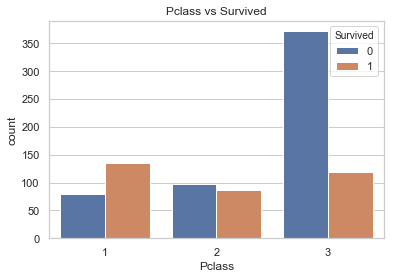

In [10]:
sns.countplot('Pclass', hue='Survived', data=titanic)
plt.title('Pclass vs Survived')
plt.show()

Looking at the above figure we can easily say that the 1st class passengers were given the highest priority during rescue , while the 3rd class passengers were given the least priority

In [11]:
pd.crosstab([titanic.Sex, titanic.Survived], titanic.Pclass, margins=True).style.background_gradient(cmap='summer_r')

C:\Users\SHIVAM\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


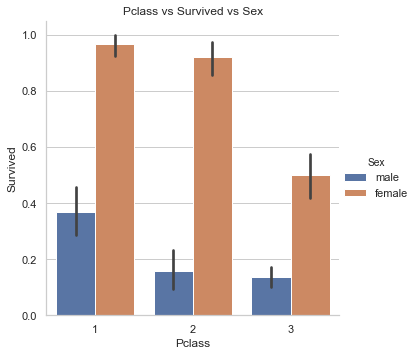

In [12]:
sns.catplot('Pclass', 'Survived', hue='Sex', data=titanic, kind='bar')
plt.title('Pclass vs Survived vs Sex')
plt.show()

Now, in Age feature we have 177 null values filled with NaN. We have to deal with it. But we can't enter mean of age in every NaN column, because our average/mean is 29 and we cannot put 29 for a child or some old man. So we have to discover something better. Let's do something more interesting with dataset by exploring more.
The 'Name' feature looks interesting. Let's check it....

In [13]:
titanic['Initial'] = 0
for row in titanic:
    titanic['Initial'] = titanic['Name'].str.extract('([A-Za-z]+)\.')

In [14]:
pd.crosstab(titanic['Sex'], titanic['Initial']).style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


There are many Initials but they all refer to the basic set of Mr, Mrs, Master Ans Miss.
Hence, we can replace them with mean age of respective Initial

In [15]:
titanic['Initial'].replace(['Capt', 'Col', 'Countess', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Mlle', 'Mme', 'Ms', 'Rev', 'Sir'],
                           ['Mr', 'Mr', 'Mrs', 'Mr', 'Other', 'Mr', 'Mrs', 'Mr', 'Mrs', 'Mrs', 'Miss', 'Other', 'Mr'], inplace=True)

In [16]:
titanic.groupby(['Initial', 'Sex']).mean()['Age']

Initial  Sex   
Master   male       7.086662
Miss     female    23.367040
Mr       male      32.050848
Mrs      female    34.883731
Other    female    49.000000
         male      40.974926
Name: Age, dtype: float64

In [17]:
titanic.loc[(titanic.Age.isnull()) & (titanic.Initial=='Mr'), 'Age'] = 32
titanic.loc[(titanic.Age.isnull()) & (titanic.Initial=='Mrs'), 'Age'] = 35
titanic.loc[(titanic.Age.isnull()) & (titanic.Initial=='Master'), 'Age'] = 7
titanic.loc[(titanic.Age.isnull()) & (titanic.Initial=='Miss'), 'Age'] = 23

In [18]:
titanic.Age.isnull().any()

False

C:\Users\SHIVAM\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


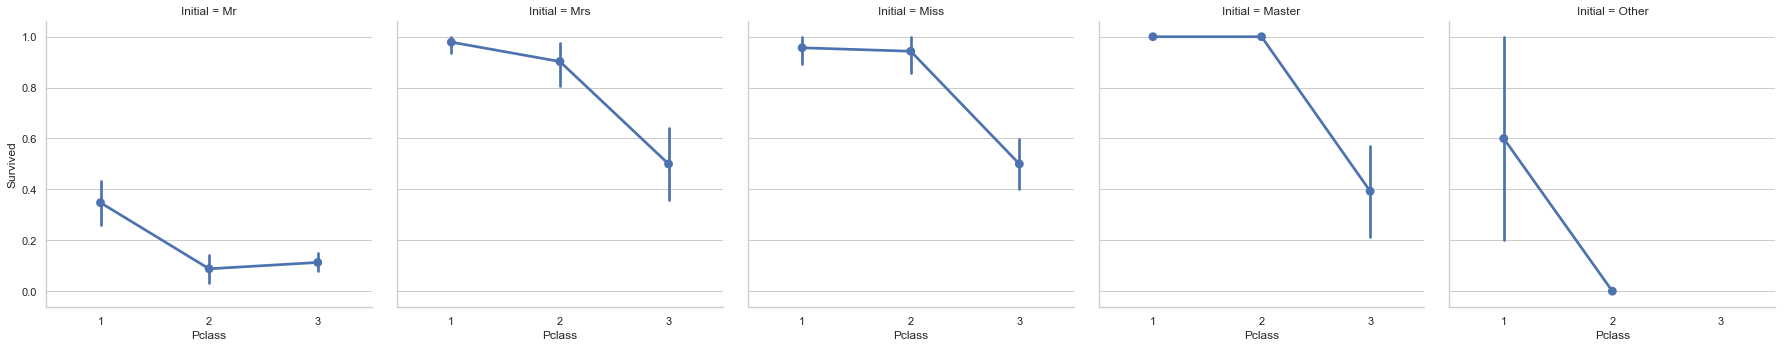

In [19]:
sns.catplot('Pclass', 'Survived', col='Initial', data=titanic, kind='point')
plt.show()

From the above plot it is seen that women and children were rescued first irrespective of the class. Now lets explore other features.

In [20]:
pd.crosstab(titanic['SibSp'], titanic['Survived']).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


C:\Users\SHIVAM\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


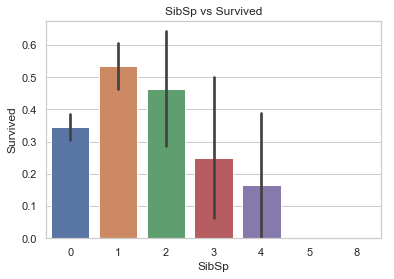

In [21]:
sns.barplot(x='SibSp', y='Survived', data=titanic)
plt.title('SibSp vs Survived')
plt.show()

In [22]:
pd.crosstab(titanic.SibSp, titanic.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


We can clearly see that if a passanger is alone in ship with no siblings, survival rate is higher than those having any siblings. The graph decreases as no of siblings increase. This is interesting because, If I have a family onboard, I will save them instead of saving myself. But there’s something wrong, the survival rate for families with 5–8 members is 0%. Is this because of PClass? Yes this is PClass, The crosstab shows that Person with SibSp>3 were all in Pclass3. It is imminent that all the large families in Pclass3(>3) died.